### Normalization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

In [2]:
import seaborn
df = seaborn.load_dataset('penguins')
df.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


#### Distances are highly dominated by the features with the largest scales

--- distance     1800.20
--- distance[5]  1800.00


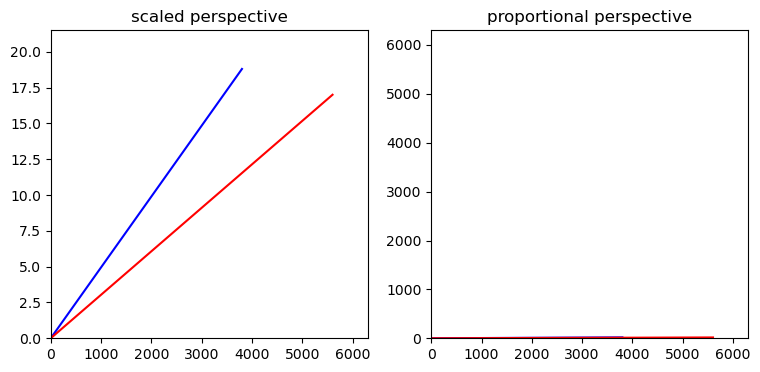

In [3]:
# select two random vector
u, v = df.iloc[np.random.randint(0, df.shape[0])], df.iloc[np.random.randint(0, df.shape[0])]

# distance computed with all numeric features
d_ = np.sqrt(np.sum((u[[2, 3, 4, 5]] -v[[2, 3, 4, 5]])**2))
print('--- distance    %8.2f' %d_)

# distance computed using only component 5: body_mass_g
d5 = np.abs(u[5] - v[5])
print('--- distance[5] %8.2f' %d5)

#### visualization using components 5: body_mass and 3: bill-depth_mm
fig, axs = plt.subplots(1, 2, figsize = (9, 4))

# plot vectors
axs[0].plot((0, u[5]), (0, u[3]), 'b-')
axs[0].plot((0, v[5]), (0, v[3]), 'r-')
axs[0].set_xlim((0, df.iloc[:, 5].max()))
axs[0].set_ylim((0, df.iloc[:, 3].max()))
axs[0].set_title('scaled perspective')

# plot same vectors with the right perpective
axs[1].plot((0, u[5]), (0, u[3]), 'b-')
axs[1].plot((0, v[5]), (0, v[3]), 'r-')
axs[1].set_xlim((0, df.iloc[:, 5].max()))
axs[1].set_ylim((0, df.iloc[:, 5].max()))
axs[1].set_title('proportional perspective');

In [4]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


#### Normalization
- Normalization means rescaling a numeric feature into the interval (0, 1)
- Normalized features have a balanced leverage on the computation of distances
- We normalize using the following expression:
$$ \forall x \in X,\quad x_{norm} = \frac{x - \min{\left(X\right)}}{\max{\left(X\right)} - \min{\left(X\right)}}$$

In [5]:
def normalize__(col):
    if col.dtype == 'float':
        return (col - col.min()) /(col.max() -col.min())
    else:
        return col

In [6]:
df = df.apply(normalize__, axis = 0)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,0.254545,0.666667,0.152542,0.291667,Male
1,Adelie,Torgersen,0.269091,0.511905,0.237288,0.305556,Female
2,Adelie,Torgersen,0.298182,0.583333,0.389831,0.152778,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,0.167273,0.738095,0.355932,0.208333,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,0.534545,0.142857,0.728814,0.597222,Female
341,Gentoo,Biscoe,0.665455,0.309524,0.847458,0.847222,Male
342,Gentoo,Biscoe,0.476364,0.202381,0.677966,0.694444,Female


In [7]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,0.429888,0.482282,0.490088,0.417154
std,0.198530,0.235094,0.238334,0.222765
min,0.000000,0.000000,0.000000,0.000000
25%,0.259091,0.297619,0.305085,0.236111
50%,0.449091,0.500000,0.423729,0.375000
75%,0.596364,0.666667,0.694915,0.569444
max,1.000000,1.000000,1.000000,1.000000


#### distances after normalization

--- distance        1.02
--- distance[5]     0.59


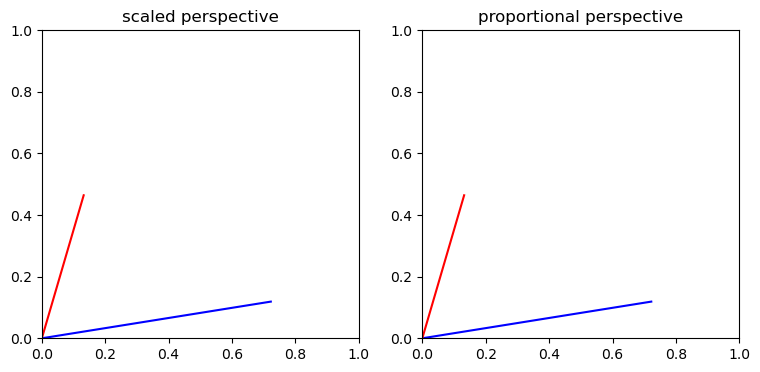

In [8]:
# select two random vector
u, v = df.iloc[np.random.randint(0, df.shape[0])], df.iloc[np.random.randint(0, df.shape[0])]

# distance computed with all numeric features
d_ = np.sqrt(np.sum((u[[2, 3, 4, 5]] -v[[2, 3, 4, 5]])**2))
print('--- distance    %8.2f' %d_)

# distance computed using only component 5: body_mass_g
d5 = np.abs(u[5] - v[5])
print('--- distance[5] %8.2f' %d5)

#### visualization using components 5: body_mass and 3: bill-depth_mm
fig, axs = plt.subplots(1, 2, figsize = (9, 4))

# plot vectors
axs[0].plot((0, u[5]), (0, u[3]), 'b-')
axs[0].plot((0, v[5]), (0, v[3]), 'r-')
axs[0].set_xlim((0, df.iloc[:, 5].max()))
axs[0].set_ylim((0, df.iloc[:, 3].max()))
axs[0].set_title('scaled perspective')

# plot same vectors with the right perpective
axs[1].plot((0, u[5]), (0, u[3]), 'b-')
axs[1].plot((0, v[5]), (0, v[3]), 'r-')
axs[1].set_xlim((0, df.iloc[:, 5].max()))
axs[1].set_ylim((0, df.iloc[:, 5].max()))
axs[1].set_title('proportional perspective');